## Similarity
- What is the similarity of two documents at hand?
- How to search through all the documents out there? 

### Bag of words model 
Simply add word count sparse vector of all words in the document and produce a product. To get a better measure, use normalized vector where the counts are squarred and summed and the square root of the result is used as devidend for the counts in the vector

### Importance of words 
Few words characterize better about the article than others like 'the'. So, these 'rare' words can have better weights. But, we need to find a middle ground between **local frequency and global rarity** of important words

### Term Frequency - Inverse Document Frequency (TF - IDF)
Used to represent this local frequency vs global rarity measure. IDF acts as weights to represent each of the words (it's measure of importance as a function of it's frequency)

Term Frequency - Same as word counts in the document
Inverse Document Frequency can be calculated as,
$$log(#docs / (1 + #docs containing word))$$


Here 1 exists just to avoid ** `dividing by zero` ** error

### Nearest neighbour search
Most nearest article, just the best similarity score
K - nearest article, priority queue of the topk most similar articles found so for

### Clustering 
Clustering mostly is a multi-class classification problem. That is an example of supervised learning since we are training using labels. What if no labels are provided? And we start from scratch with no training data?

#### As an unsupervised learning algorithm:
**Input**: docs as vectors <br/>
**Output**: cluster labels

After the clustering is done, we can do post-facto label each of the clusters

Cluster is defined by cluster center and shape/spread of the clusters. Sometimes, we just look at how close the document is to the center of the cluster (distance)

### K-Means Clustering Algorithm
- Uses just the distance from cluster center as metric.
- Assumes there are k clusters or k buckets. 
- **Voronoi tesselation** - Colored regions for each of the clusters.
- Revise the cluster center(s) based on the observations. Now we redraw the voronoi tesselation (Regions); reassign the articles to clusters and repeat until convergence (or no change)

### Real world examples of Clustering
 - Google image search clustering
 - medical cases (cluster seizures and identify types; better treatment)
 - product categories based on purchase histories
 - structering web search results (by providing context of what meaning)
 - discovering similar neighbourhoods based on price of housing, quality of life, cost of living, education
 - forecast crimes for better alignment of police forces

One measure of **quality** of the clustering algorithm is the distance between the center of the cluster and the documents.

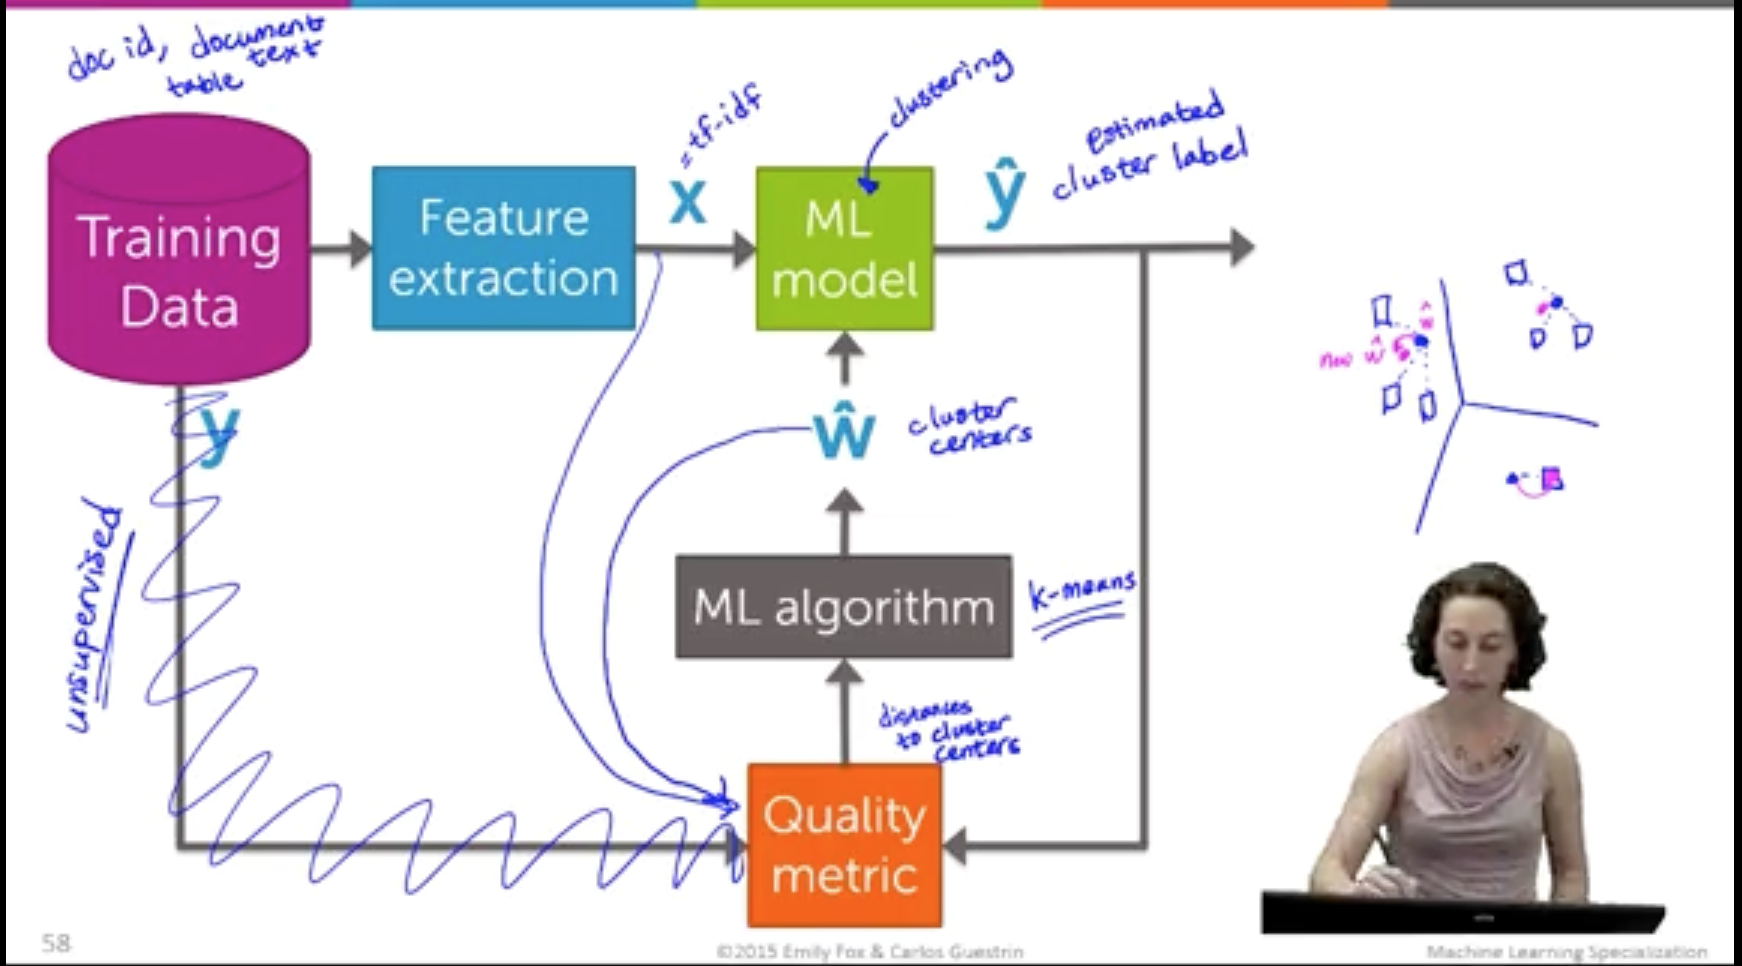

In [2]:
## Clustering Flow model
from IPython.display import Image

Image('images/clustering_flow.png')

In [5]:
## Never mind this, I instead calculated this manually
def similarity(b):
    a = [1,3,2,1,2,1,1]
    return [a*b for a,b in zip(lista,listb)]

In [6]:
import graphlab as ga

A newer version of GraphLab Create (v1.10) is available! Your current version is v1.9.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [7]:
people = ga.SFrame('people_wiki.gl/')

This non-commercial license of GraphLab Create is assigned to sugavaneshb@gmail.com and will expire on May 15, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-06-05 19:18:27,203 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: /tmp/graphlab_server_1465134503.log


In [8]:
people.head()

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


In [9]:
people.show()

Canvas is accessible via web browser at the URL: http://localhost:50788/index.html
Opening Canvas in default web browser.


In [10]:
obama = people[people['name'] == 'Barack Obama']

In [11]:
obama

URI,name,text
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...


In [12]:
obama['text']

dtype: str
Rows: ?
['barack hussein obama ii brk husen bm born august 4 1961 is the 44th and current president of the united states and the first african american to hold the office born in honolulu hawaii obama is a graduate of columbia university and harvard law school where he served as president of the harvard law review he was a community organizer in chicago before earning his law degree he worked as a civil rights attorney and taught constitutional law at the university of chicago law school from 1992 to 2004 he served three terms representing the 13th district in the illinois senate from 1997 to 2004 running unsuccessfully for the united states house of representatives in 2000in 2004 obama received national attention during his campaign to represent illinois in the united states senate with his victory in the march democratic party primary his keynote address at the democratic national convention in july and his election to the senate in november he began his presidential campa

In [13]:
people[people['name'] == 'George Clooney']['text']

dtype: str
Rows: ?
['george timothy clooney born may 6 1961 is an american actor writer producer director and activist he has received three golden globe awards for his work as an actor and two academy awards one for acting and the other for producingclooney made his acting debut on television in 1978 and later gained wide recognition in his role as dr doug ross on the longrunning medical drama er from 1994 to 1999 for which he received two emmy award nominations while working on er he began attracting a variety of leading roles in films including the superhero film batman robin 1997 and the crime comedy out of sight 1998 in which he first worked with a director who would become a longtime collaborator steven soderbergh in 1999 clooney took the lead role in three kings a wellreceived war satire set during the gulf warin 2001 clooneys fame widened with the release of his biggest commercial success the heist comedy oceans eleven the first of the film trilogy a remake of the 1960 film wit

In [14]:
# show canvas for exploration in the notebook itself
ga.canvas.set_target('ipynb')

In [15]:
obama['word_count'] = ga.text_analytics.count_words(obama['text'])

In [16]:
obama['word_count']

dtype: dict
Rows: 1
[{'operations': 1, 'represent': 1, 'office': 2, 'unemployment': 1, 'is': 2, 'doddfrank': 1, 'over': 1, 'unconstitutional': 1, 'domestic': 2, 'named': 1, 'ending': 1, 'ended': 1, 'proposition': 1, 'seats': 1, 'graduate': 1, 'worked': 1, 'before': 1, 'death': 1, '20': 2, 'taxpayer': 1, 'inaugurated': 1, 'obamacare': 1, 'civil': 1, 'mccain': 1, 'to': 14, '4': 1, 'policy': 2, '8': 1, 'has': 4, '2011': 3, '2010': 2, '2013': 1, '2012': 1, 'bin': 1, 'then': 1, 'his': 11, 'march': 1, 'gains': 1, 'cuba': 1, 'californias': 1, '1992': 1, 'new': 1, 'not': 1, 'during': 2, 'years': 1, 'continued': 1, 'presidential': 2, 'husen': 1, 'osama': 1, 'term': 3, 'equality': 1, 'prize': 1, 'lost': 1, 'stimulus': 1, 'january': 3, 'university': 2, 'rights': 1, 'gun': 1, 'republican': 2, 'rodham': 1, 'troop': 1, 'withdrawal': 1, 'involvement': 3, 'response': 3, 'where': 1, 'referred': 1, 'affordable': 1, 'attorney': 1, 'school': 3, 'senate': 3, 'house': 2, 'national': 2, 'creation': 1, 'relat

In [17]:
print obama['word_count']

[{'operations': 1, 'represent': 1, 'office': 2, 'unemployment': 1, 'is': 2, 'doddfrank': 1, 'over': 1, 'unconstitutional': 1, 'domestic': 2, 'named': 1, 'ending': 1, 'ended': 1, 'proposition': 1, 'seats': 1, 'graduate': 1, 'worked': 1, 'before': 1, 'death': 1, '20': 2, 'taxpayer': 1, 'inaugurated': 1, 'obamacare': 1, 'civil': 1, 'mccain': 1, 'to': 14, '4': 1, 'policy': 2, '8': 1, 'has': 4, '2011': 3, '2010': 2, '2013': 1, '2012': 1, 'bin': 1, 'then': 1, 'his': 11, 'march': 1, 'gains': 1, 'cuba': 1, 'californias': 1, '1992': 1, 'new': 1, 'not': 1, 'during': 2, 'years': 1, 'continued': 1, 'presidential': 2, 'husen': 1, 'osama': 1, 'term': 3, 'equality': 1, 'prize': 1, 'lost': 1, 'stimulus': 1, 'january': 3, 'university': 2, 'rights': 1, 'gun': 1, 'republican': 2, 'rodham': 1, 'troop': 1, 'withdrawal': 1, 'involvement': 3, 'response': 3, 'where': 1, 'referred': 1, 'affordable': 1, 'attorney': 1, 'school': 3, 'senate': 3, 'house': 2, 'national': 2, 'creation': 1, 'related': 1, 'hawaii': 1,

In [18]:
## sort the word count for the obama article
obama_word_count_table = obama[['word_count']].stack('word_count', new_column_name=['word', 'count'])

In [19]:
obama_word_count_table

word,count
cuba,1
relations,1
sought,1
combat,1
ending,1
withdrawal,1
state,1
islamic,1
by,1
gains,1


In [20]:
obama_word_count_table.sort('count', ascending=False)

word,count
the,40
in,30
and,21
of,18
to,14
his,11
obama,9
act,8
he,7
a,7


In [21]:
## compute tf_idf for the corpus
people['word_count'] = ga.text_analytics.count_words(people['text'])

In [22]:
people

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'selection': 1,'carltons': 1, 'being': ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise': 1, 'thomas':1, 'closely': 1, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just': 1, 'issued': 1,'mainly': 1, 'nominat ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'all': 1,'bauforschung': 1, ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'they': 1,'gangstergenka': 1, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'currently': 1, 'less':1, 'being': 1, ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'exclusive': 2,'producer': 1, 'show' ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'taxi': 1, 'salon': 1,'gangs': 1, 'being': 1, ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'houston': 1, 'frankie':1, 'labels': 1, ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'phenomenon': 1,'deborash': 1, 'both' ..."


In [23]:
tfidf = ga.text_analytics.tf_idf(people['word_count'])

In [24]:
tfidf

dtype: dict
Rows: 59071
[{'selection': 3.836578553093086, 'carltons': 7.0744723837970485, 'being': 1.7938099524877322, '2005': 1.6425861253275964, 'coach': 5.444264118987054, 'its': 1.6875948402695313, 'before': 2.9935647453367427, '21': 2.797250863489293, 'northern': 3.310021742836038, 'bullants': 7.489987827758714, 'to': 0.23472468840899618, 'perth': 5.051601193605607, 'sydney': 3.5981675296480873, '2014': 2.2073995783446634, 'has': 0.428497539744039, '2011': 1.7023470901042916, '2013': 1.9545642372230505, 'division': 2.7906099979103978, 'his': 0.7878343656409721, 'rules': 3.8272034844276295, 'assistant': 2.5220702633476124, 'spanned': 5.531174273867493, 'early': 1.929422753652229, 'game': 2.4168995190159084, 'five': 2.2137301792754096, 'during': 1.3174651479035495, 'continued': 2.720588055069447, '44game': 9.887883100557085, 'kangaroos': 20.726873835958425, 'twice': 3.3301582227950113, 'round': 2.897933583948961, 'the': 0.0027426017494956603, 'parade': 5.510031837293684, 'born': 0.2

In [25]:
tfidf['docs']

IndexError: Invalid type to use for indexing

In [27]:
people['tfidf'] = tfidf

In [29]:
obama = people[people['name'] == 'Barack Obama']
obama[['tfidf']].stack('tfidf', new_column_name=['word', 'tfidf']).sort('tfidf', ascending=False)

word,tfidf
obama,43.2956530721
act,27.678222623
iraq,17.747378588
control,14.8870608452
law,14.7229357618
ordered,14.5333739509
military,13.1159327785
involvement,12.7843852412
response,12.7843852412
democratic,12.4106886973


In [31]:
clinton = people[people['name'] == 'Bill Clinton']
beckham = people[people['name'] == 'David Beckham']

### Is obama closer to clinton than Beckham?


In [32]:
clinton.head()

Columns:
	URI	str
	name	str
	text	str
	word_count	dict
	tfidf	dict

Rows: 1

Data:
+-------------------------------+--------------+-------------------------------+
|              URI              |     name     |              text             |
+-------------------------------+--------------+-------------------------------+
| <http://dbpedia.org/resour... | Bill Clinton | william jefferson bill cli... |
+-------------------------------+--------------+-------------------------------+
+-------------------------------+-------------------------------+
|           word_count          |             tfidf             |
+-------------------------------+-------------------------------+
| {'rating': 1, 'serving': 1... | {'rating': 5.3770235940402... |
+-------------------------------+-------------------------------+
[1 rows x 5 columns]

In [34]:
obama['tfidf']


dtype: dict
Rows: ?
[{'operations': 3.811771079388818, 'represent': 4.184100625900883, 'office': 5.2481728232196465, 'unemployment': 6.642689967371511, 'is': 0.05523250095103997, 'doddfrank': 9.887883100557085, 'over': 1.4878231559557336, 'unconstitutional': 6.8276123058655225, 'domestic': 8.967410686619141, 'named': 2.0300155412252816, 'ending': 4.547145018125096, 'ended': 3.3430124821479934, 'proposition': 6.926052378678775, 'seats': 5.000043383940756, 'graduate': 2.6750971107885535, 'worked': 1.553891853362109, 'before': 1.4967823726683713, 'death': 3.1568650000750016, '20': 4.88376320446593, 'taxpayer': 7.431147327735781, 'inaugurated': 6.27696518791286, 'obamacare': 9.04058524016988, 'civil': 3.3244978303233013, 'mccain': 6.766987684049088, 'to': 0.6572291275451893, '4': 2.437803530749586, 'policy': 6.095386282141427, '8': 2.7572509724892824, 'has': 1.713990158976156, '2011': 5.107041270312875, '2010': 3.185667920243947, '2013': 1.9545642372230505, '2012': 1.7938099524877322, 'bin

In [35]:
ga.distances.cosine(obama['tfidf'][0], clinton['tfidf'][0])

0.8339854936884276

In [37]:
ga.distances.cosine(obama['tfidf'][0], beckham['tfidf'][0])

0.9791305844747478

In [38]:
## Building a nearest neighbour model
knn_model = ga.nearest_neighbors.create(people,features=['tfidf'],label='name')

Starting brute force nearest neighbors model training.

In [40]:
## Applying the built knn_model for retrieval
## Who is closest to Obama
knn_model.query(obama)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 16.313ms     |

| Done         |         | 100         | 526.816ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Barack Obama,0.0,1
0,Joe Biden,0.794117647059,2
0,Joe Lieberman,0.794685990338,3
0,Kelly Ayotte,0.811989100817,4
0,Bill Clinton,0.813852813853,5


In [41]:
## Other examples of document retrieval
swift = people[people['name'] == 'Taylor Swift']

In [42]:
knn_model.query(swift)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 22.538ms     |

| Done         |         | 100         | 486.98ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Taylor Swift,0.0,1
0,Carrie Underwood,0.76231884058,2
0,Alicia Keys,0.764705882353,3
0,Jordin Sparks,0.769633507853,4
0,Leona Lewis,0.776119402985,5


In [44]:
knn_model.query(people[people['name'] == 'Arnold Schwarzenegger'])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 17.687ms     |

| Done         |         | 100         | 468.174ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Arnold Schwarzenegger,0.0,1
0,Jesse Ventura,0.818918918919,2
0,John Kitzhaber,0.824615384615,3
0,Lincoln Chafee,0.833876221498,4
0,Anthony Foxx,0.833910034602,5


In [45]:
elton = people[people['name'] == 'Elton John']

In [46]:
elton['tfidf']

dtype: dict
Rows: ?
[{'all': 1.6431112434912472, 'least': 4.251903729252247, 'producer': 2.6157162162644934, 'heavily': 4.584578192498009, 'inducted': 3.6213152632041816, 'john': 13.93931279239831, 'over': 2.975646311911467, 'named': 2.0300155412252816, 'making': 2.7223896254962385, 'years': 1.0752380994247055, 'four': 1.922106072733316, 'openly': 5.056906245835299, 'including': 1.2272824458461182, 'highestprofile': 8.789270811888976, 'its': 3.3751896805390627, 'impact': 4.04144432549936, '1': 4.195753163848633, '27': 3.110616229728885, '21': 5.594501726978586, 'wed': 6.908957945319475, 'datein': 8.153282045168979, 'royal': 2.8056144472288045, '1947': 3.756656611073944, 'abbey': 5.693190564500702, 'winning': 2.416330313042851, 'late': 2.374355720500003, 'to': 0.18777975072719694, 'taupin': 9.600201028105303, 'born': 0.268196273764765, '2014': 2.2073995783446634, 'as': 0.2543390440248236, 'has': 3.8564778576963508, '2013': 1.9545642372230505, 'his': 1.0504458208546295, 'march': 1.957317

In [47]:
elton

Columns:
	URI	str
	name	str
	text	str
	word_count	dict
	tfidf	dict

Rows: Unknown

Data:
+-------------------------------+------------+-------------------------------+
|              URI              |    name    |              text             |
+-------------------------------+------------+-------------------------------+
| <http://dbpedia.org/resour... | Elton John | sir elton hercules john cb... |
+-------------------------------+------------+-------------------------------+
+-------------------------------+-------------------------------+
|           word_count          |             tfidf             |
+-------------------------------+-------------------------------+
| {'all': 1, 'least': 1, 'pr... | {'all': 1.6431112434912472... |
+-------------------------------+-------------------------------+
[? rows x 5 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

In [49]:
elton_word_count_table = elton[['word_count']].stack('word_count', new_column_name=['word', 'count']).sort('count', ascending=False)

In [50]:
elton_word_count_table

word,count
the,27
in,18
and,15
of,13
a,10
has,9
john,7
he,7
on,6
award,5


In [51]:
elton_tfidf_table = elton[['tfidf']].stack('tfidf', new_column_name=['word', 'tfidf']).sort('tfidf', ascending=False)

In [52]:
elton_tfidf_table

word,tfidf
furnish,18.38947184
elton,17.48232027
billboard,17.3036809575
john,13.9393127924
songwriters,11.250406447
tonightcandle,10.9864953892
overallelton,10.9864953892
19702000,10.2933482087
fivedecade,10.2933482087
aids,10.262846934


In [53]:
victoria = people[people['name'] == 'Victoria Beckham']

In [54]:
ga.distances.cosine(elton['tfidf'][0], victoria['tfidf'][0])

0.9567006376655429

In [55]:
paul = people[people['name'] == 'Paul McCartney']

In [56]:
ga.distances.cosine(elton['tfidf'][0], paul['tfidf'][0])

0.8250310029221779

In [59]:
word_count_model = ga.nearest_neighbors.create(people, features=['word_count'], label='name', distance='cosine')
tfidf_model = ga.nearest_neighbors.create(people, features=['tfidf'], label='name', distance='cosine')

Starting brute force nearest neighbors model training.

Starting brute force nearest neighbors model training.

In [60]:
word_count_model.query(elton)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 18.905ms     |

| Done         |         | 100         | 497.346ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Elton John,2.22044604925e-16,1
0,Cliff Richard,0.16142415259,2
0,Sandro Petrone,0.16822542751,3
0,Rod Stewart,0.168327165587,4
0,Malachi O'Doherty,0.177315545979,5


In [61]:
tfidf_model.query(elton)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 18.889ms     |

| Done         |         | 100         | 524.555ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Elton John,-2.22044604925e-16,1
0,Rod Stewart,0.717219667893,2
0,George Michael,0.747600998969,3
0,Sting (musician),0.747671954431,4
0,Phil Collins,0.75119324879,5


In [62]:
word_count_model.query(victoria)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 14.472ms     |

| Done         |         | 100         | 311.256ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Victoria Beckham,-2.22044604925e-16,1
0,Mary Fitzgerald (artist),0.207307036115,2
0,Adrienne Corri,0.214509782788,3
0,Beverly Jane Fry,0.217466468741,4
0,Raman Mundair,0.217695474992,5


In [63]:
tfidf_model.query(victoria)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 16.818ms     |

| Done         |         | 100         | 528.329ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Victoria Beckham,1.11022302463e-16,1
0,David Beckham,0.548169610263,2
0,Stephen Dow Beckham,0.784986706828,3
0,Mel B,0.809585523409,4
0,Caroline Rush,0.819826422919,5
